# **Introdução aos dados**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('dados.xlsx')
# importando a base de dados como um dataframe pela biblioteca do pandas

In [ ]:
df.shape
# retorna a quantidade de linhas e colunas da base, nesta ordem

(25, 11)

In [ ]:
df.info()
# retorna as informações sobre as colunas da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Ano                                             25 non-null     int64  
 1   PIB em bilhões de doláres (USD)                 25 non-null     int64  
 2   Total da população brasileira                   25 non-null     int64  
 3   População total acima dos 25+                   24 non-null     float64
 4   Total de 25+ com graduação completa             16 non-null     float64
 5   População total acima dos 15+                   24 non-null     float64
 6   Total de 15+ alfabetizados                      23 non-null     float64
 7   Total de força de trabalho                      25 non-null     int64  
 8   Total de força de trabalho com ensino superior  22 non-null     float64
 9   Exportação de tecnologia em USD              

In [ ]:
df.isnull().sum()
# quantidade de linhas vazias por coluna

,0
Ano,0
PIB em bilhões de doláres (USD),0
Total da população brasileira,0
População total acima dos 25+,1
Total de 25+ com graduação completa,9
População total acima dos 15+,1
Total de 15+ alfabetizados,2
Total de força de trabalho,0
Total de força de trabalho com ensino superior,3
Exportação de tecnologia em USD,0


# **Tratamento de dados**

In [ ]:
# função que executa a interpolação entre os dados: interpolate. Nela, devemos classificar o método desta equilíbrio de dados. Neste caso, linear.
df_interpolated = df
df_interpolated['Total de 25+ com graduação completa'] = df['Total de 25+ com graduação completa'].interpolate(method='linear')

df_interpolated['Total de 15+ alfabetizados'] = df['Total de 15+ alfabetizados'].interpolate(method='linear')

In [ ]:
df_interpolated.isnull().sum()
# antes não havia dados, criamos a interpolação de dados. Garantimos todos os dados através da média.

,0
Ano,0
PIB em bilhões de doláres (USD),0
Total da população brasileira,0
População total acima dos 25+,1
Total de 25+ com graduação completa,0
População total acima dos 15+,1
Total de 15+ alfabetizados,0
Total de força de trabalho,0
Total de força de trabalho com ensino superior,3
Exportação de tecnologia em USD,0


In [ ]:
print(df_interpolated.columns)

Index(['Ano', 'PIB em bilhões de doláres (USD)',
       'Total da população brasileira ', 'População total acima dos 25+',
       'Total de 25+ com graduação completa', 'População total acima dos 15+',
       'Total de 15+ alfabetizados', 'Total de força de trabalho',
       'Total de força de trabalho com ensino superior',
       'Exportação de tecnologia em USD',
       'Exportação de comércio e serviços em USD'],
      dtype='object')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# padronizando a exibição de números grandes

In [ ]:
df_interpolated.describe()
# esta função irá retornar as informações mais comuns em estatistíca

,Ano,PIB em bilhões de doláres (USD),Total da população brasileira,População total acima dos 25+,Total de 25+ com graduação completa,População total acima dos 15+,Total de 15+ alfabetizados,Total de força de trabalho,Total de força de trabalho com ensino superior,Exportação de tecnologia em USD,Exportação de comércio e serviços em USD
count,25.00,25.00,25.00,24.00,25.00,24.00,25.00,25.00,22.00,25.00,25.00
mean,2012.00,1632228960000.00,195748177.76,114146916.67,15104862.44,148024000.00,136161638.60,96808322.44,80574093.95,16580517267.13,26811149209.16
std,7.36,670172011049.25,11839719.12,15913303.08,7651270.86,14759635.40,17124943.75,7705599.07,5164858.53,8515386558.66,12035479132.10
min,2000.00,509795000000.00,174018282.00,87540000.00,5952720.00,122016000.00,104933760.00,80295093.00,69335049.00,4175348599.41,7858908525.00
25%,2006.00,1107630000000.00,186653106.00,101041500.00,8374839.00,136369500.00,123261300.00,92726865.00,78372636.75,8024435530.13,16213807325.00
50%,2012.00,1795690000000.00,196876111.00,115115500.00,13155109.00,149044000.00,136619290.00,96857149.00,79798608.00,20094561460.03,30812675925.00
75%,2018.00,2150670000000.00,206107261.00,127631000.00,21078426.00,160799000.00,150721140.00,103476109.00,84535082.75,21544171967.63,34662630539.00
max,2024.00,2616160000000.00,211998573.00,137940000.00,27778618.00,169048000.00,159844410.00,106790403.00,88367073.00,32808187171.30,47707681688.00


# **Gráficos por números inteiros**

In [ ]:
import seaborn as sns
# esta biblioteca irá nos permitir manipular e exibir a distribuição dos dados

In [ ]:
import matplotlib.pyplot as plt
# esta biblioteca permitirá que gráficos sejam criados

<Axes: xlabel='Ano', ylabel='PIB em bilhões de doláres (USD)'>

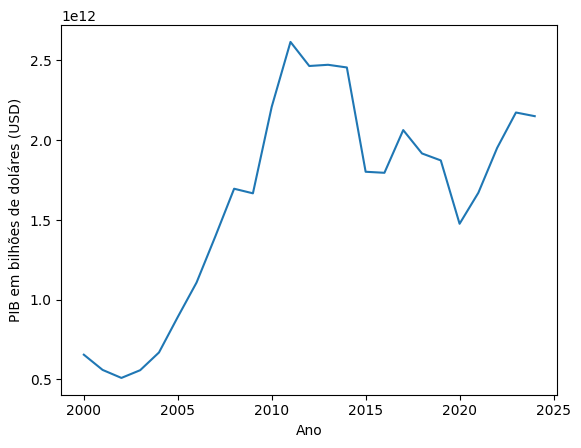

In [ ]:
sns.lineplot(data=df_interpolated, x=df_interpolated.iloc[:, 0], y=df_interpolated.iloc[:, 1])
# este gráfico apresenta através da coluna de PIB em relação a coluna ano

In [ ]:
df_interpolated.columns

Index(['Ano', 'PIB em bilhões de doláres (USD)',
       'Total da população brasileira ', 'População total acima dos 25+',
       'Total de 25+ com graduação completa', 'População total acima dos 15+',
       'Total de 15+ alfabetizados', 'Total de força de trabalho',
       'Total de força de trabalho com ensino superior',
       'Exportação de tecnologia em USD',
       'Exportação de comércio e serviços em USD'],
      dtype='object')

<Axes: xlabel='Ano', ylabel='Exportação de tecnologia em USD'>

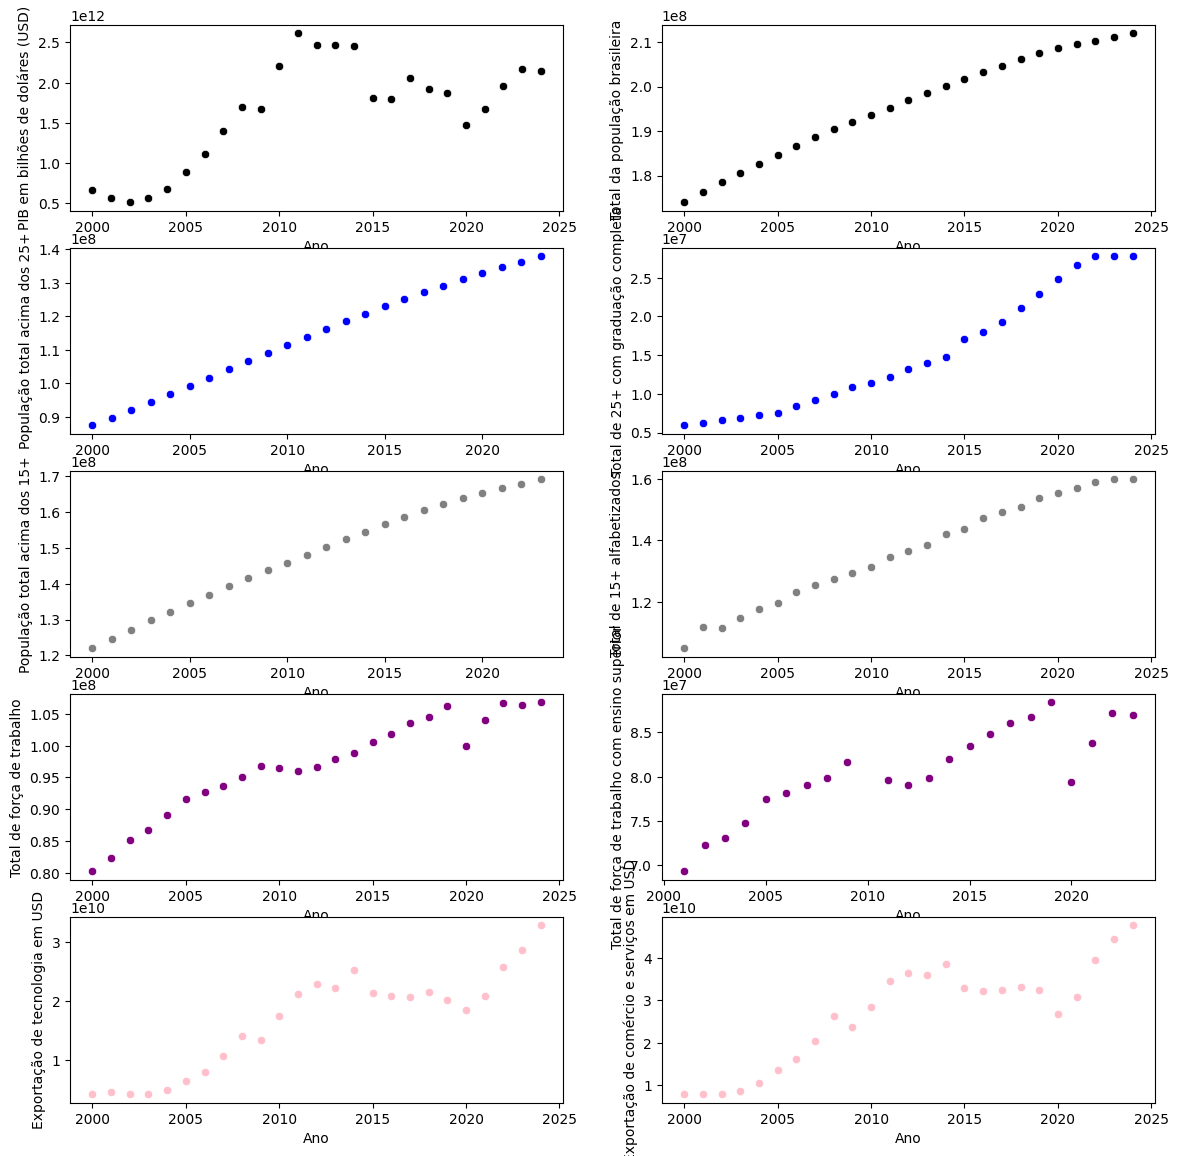

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(14, 14))

sns.scatterplot(ax=axes[0, 0], data = df_interpolated, x='Ano', y='PIB em bilhões de doláres (USD)', color='black')
sns.scatterplot(ax=axes[0, 1], data = df_interpolated, x='Ano', y='Total da população brasileira ', color='black')
sns.scatterplot(ax=axes[1, 0], data = df_interpolated, x='Ano', y='População total acima dos 25+', color='blue')
sns.scatterplot(ax=axes[1, 1], data = df_interpolated, x='Ano', y='Total de 25+ com graduação completa', color='blue')
sns.scatterplot(ax=axes[2, 0], data = df_interpolated, x='Ano', y='População total acima dos 15+', color='gray')
sns.scatterplot(ax=axes[2, 1], data = df_interpolated, x='Ano', y='Total de 15+ alfabetizados', color='gray')
sns.scatterplot(ax=axes[3, 0], data = df_interpolated, x='Ano', y='Total de força de trabalho', color='purple')
sns.scatterplot(ax=axes[3, 1], data = df_interpolated, x='Ano', y='Total de força de trabalho com ensino superior', color='purple')
sns.scatterplot(ax=axes[4, 1], data = df_interpolated, x='Ano', y='Exportação de comércio e serviços em USD', color='pink')
sns.scatterplot(ax=axes[4, 0], data = df_interpolated, x='Ano', y='Exportação de tecnologia em USD', color='pink')
# gráficos sobre os dados por ano como PIB, população e estudo

In [ ]:
df_interpolated.columns

Index(['Ano', 'PIB em bilhões de doláres (USD)',
       'Total da população brasileira ', 'População total acima dos 25+',
       'Total de 25+ com graduação completa', 'População total acima dos 15+',
       'Total de 15+ alfabetizados', 'Total de força de trabalho',
       'Total de força de trabalho com ensino superior',
       'Exportação de tecnologia em USD',
       'Exportação de comércio e serviços em USD'],
      dtype='object')

In [ ]:
# Selecionar apenas as colunas relevantes (PIB e pessoas formadas)
colunas = ['Ano', 'PIB em bilhões de doláres (USD)',
       'Total da população brasileira ', 'População total acima dos 25+',
       'Total de 25+ com graduação completa', 'População total acima dos 15+',
       'Total de 15+ alfabetizados', 'Total de força de trabalho',
       'Total de força de trabalho com ensino superior']

# Criar um novo dataframe só com essas colunas
df_interpolated2 = df_interpolated[colunas]

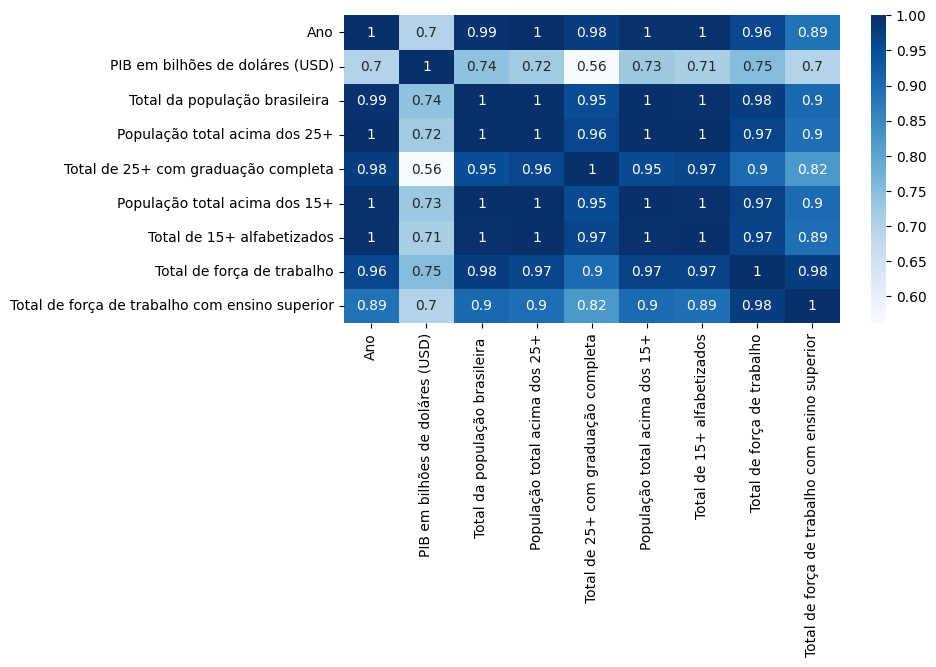

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_interpolated2.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()
# correlação entre as colunas

<Axes: xlabel='Total de 15+ alfabetizados', ylabel='PIB em bilhões de doláres (USD)'>

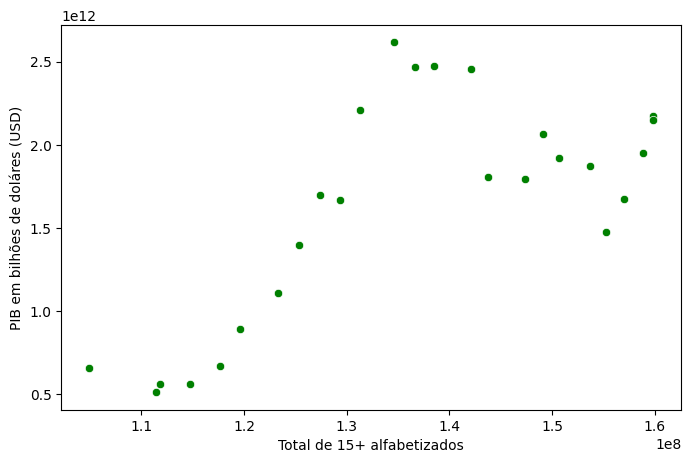

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.scatterplot(ax=axes, data = df_interpolated, x='Total de 15+ alfabetizados', y='PIB em bilhões de doláres (USD)', color='green')
# gráfico que verifica se os dados de PIB e alfabetização são correlacionais

<Axes: xlabel='Total de 25+ com graduação completa', ylabel='PIB em bilhões de doláres (USD)'>

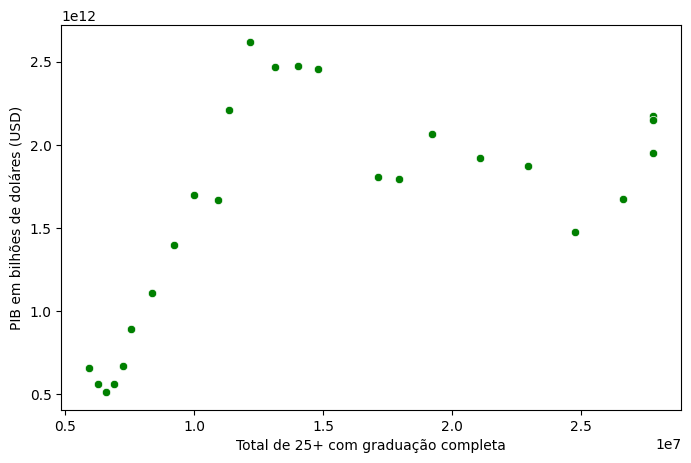

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.scatterplot(ax=axes, data = df_interpolated, x='Total de 25+ com graduação completa', y='PIB em bilhões de doláres (USD)', color='green')
# gráfico que verifica se os dados de PIB e graduação são correlacionais

# **Boxplots de números inteiros**

In [ ]:
df_interpolated.columns

Index(['Ano', 'PIB em bilhões de doláres (USD)',
       'Total da população brasileira ', 'População total acima dos 25+',
       'Total de 25+ com graduação completa', 'População total acima dos 15+',
       'Total de 15+ alfabetizados', 'Total de força de trabalho',
       'Total de força de trabalho com ensino superior',
       'Exportação de tecnologia em USD',
       'Exportação de comércio e serviços em USD'],
      dtype='object')

<Axes: ylabel='PIB em bilhões de doláres (USD)'>

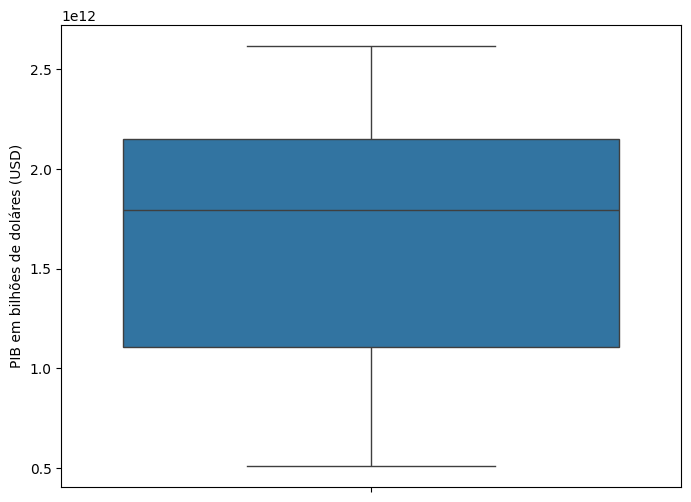

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='PIB em bilhões de doláres (USD)')

<Axes: ylabel='Total da população brasileira '>

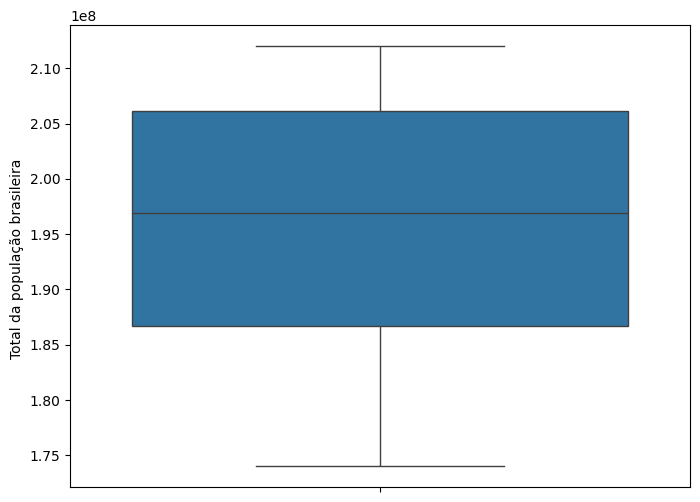

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='Total da população brasileira ')

<Axes: ylabel='Total de 25+ com graduação completa'>

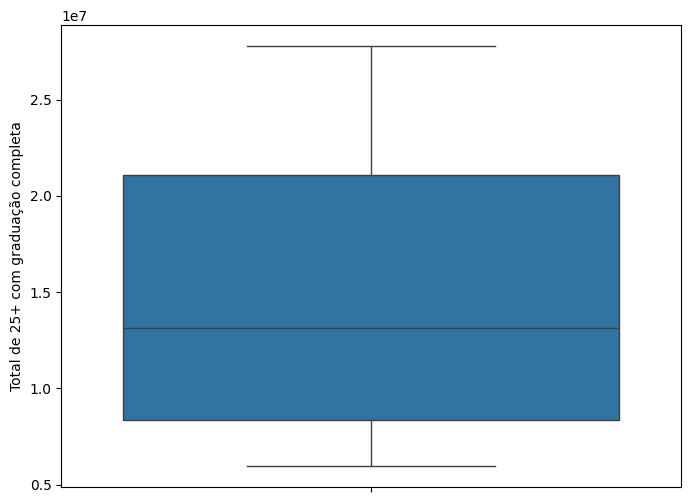

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='Total de 25+ com graduação completa')

<Axes: ylabel='Total de 15+ alfabetizados'>

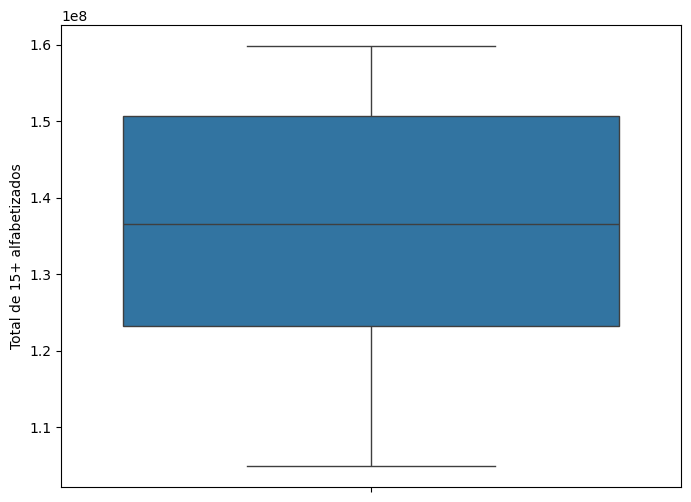

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='Total de 15+ alfabetizados')

<Axes: ylabel='Total de força de trabalho com ensino superior'>

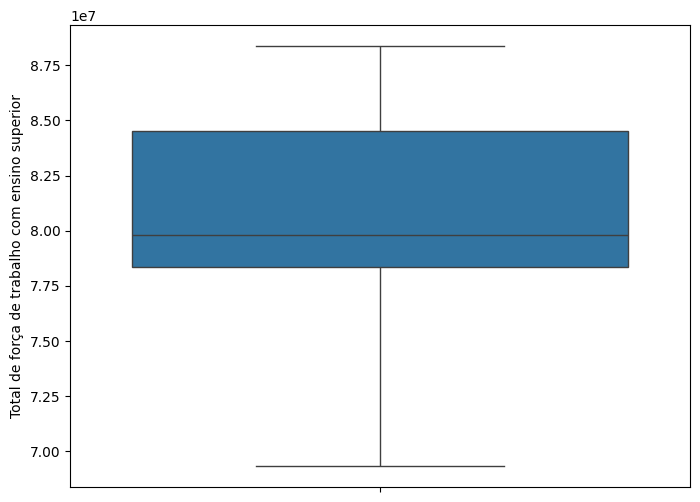

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='Total de força de trabalho com ensino superior')

<Axes: ylabel='Exportação de comércio e serviços em USD'>

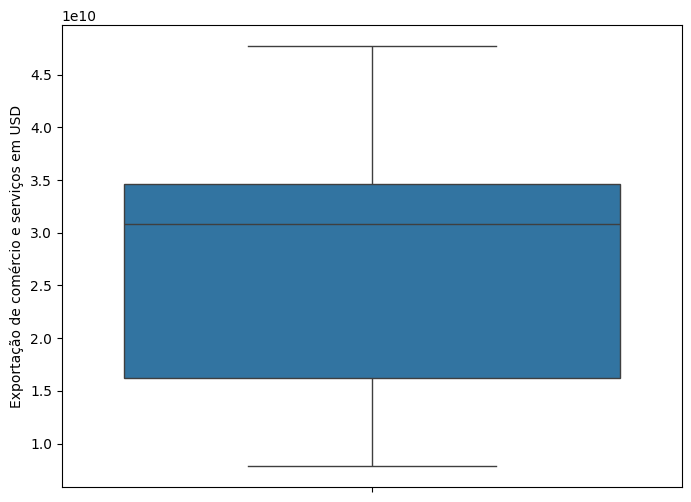

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_interpolated, y='Exportação de comércio e serviços em USD')

# **Novo Dataframe por diferenças nos valores**

In [ ]:
df_taxes = df_interpolated[['Ano']].copy()

In [ ]:
df_taxes['Crescimento_PIB'] = df['PIB em bilhões de doláres (USD)'].pct_change() * 100
#  criando uma nova coluna sobre a diferença do PIB de um ano para o outro

In [ ]:
df_taxes['Crescimento_População'] = df['Total da população brasileira '].pct_change() * 100
#  criando uma nova coluna sobre a diferença de crescimento da população de um ano para o outro

In [ ]:
df_taxes['Crescimento_População_15'] = df['População total acima dos 15+'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de crescimento da população +25 de um ano para o outro

/tmp/ipython-input-887117029.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_taxes['Crescimento_População_15'] = df['População total acima dos 15+'].pct_change() * 100


In [ ]:
df_taxes['Crescimento_Alfabetizados'] = df['Total de 15+ alfabetizados'].pct_change() * 100
# criando uma nova coluna sobre a diferença de alfabetização de um ano para o outro

In [ ]:
df_taxes['Crescimento_População_25'] = df['População total acima dos 25+'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de crescimento da população +25 de um ano para o outro

/tmp/ipython-input-2458752907.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_taxes['Crescimento_População_25'] = df['População total acima dos 25+'].pct_change() * 100


In [ ]:
df_taxes['Crescimento_Graduacao'] = df['Total de 25+ com graduação completa'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de graduados de um ano para o outro

In [ ]:
df_taxes['Crescimento_Força_Trabalho'] = df['Total de força de trabalho'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de força de trabalho de um ano para o outro

In [ ]:
df_taxes['Crescimento_Força_Trabalho_Qualificado'] = df['Total de força de trabalho com ensino superior'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de força de trabalho de um ano para o outro

/tmp/ipython-input-2710504673.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_taxes['Crescimento_Força_Trabalho_Qualificado'] = df['Total de força de trabalho com ensino superior'].pct_change() * 100


In [ ]:
df_taxes['Crescimento_Exportação'] = df['Exportação de comércio e serviços em USD'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de força de trabalho de um ano para o outro

In [ ]:
df_taxes['Crescimento_Exportação_Tecnologia'] = df['Exportação de tecnologia em USD'].pct_change() * 100
#  criando uma nova coluna sobre a diferença de exportação de tecnologia de um ano para o outro

In [ ]:
df_taxes = df_taxes.drop(index=0)
# removendo a coluna do primeiro ano considerando que se tornou nula ao não ter dados para comparação anteriores

In [ ]:
df_taxes.describe()
# esta função irá retornar as informações mais comuns em estatistíca para as taxas

,Ano,Crescimento_PIB,Crescimento_População,Crescimento_População_15,Crescimento_Alfabetizados,Crescimento_População_25,Crescimento_Graduacao,Crescimento_Força_Trabalho,Crescimento_Força_Trabalho_Qualificado,Crescimento_Exportação,Crescimento_Exportação_Tecnologia
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,23.00,24.00,24.00
mean,2012.50,6.32,0.83,1.37,1.78,1.91,6.68,1.21,1.03,8.64,9.76
std,7.07,16.30,0.27,0.50,1.32,0.62,3.38,1.89,3.01,13.60,14.53
min,2001.00,-26.62,0.36,0.00,-0.30,0.00,0.00,-5.89,-10.15,-16.85,-15.67
25%,2006.75,-3.15,0.68,1.07,1.17,1.54,4.66,0.91,0.35,-0.35,-2.94
50%,2012.50,4.90,0.81,1.45,1.52,2.01,6.90,1.37,1.13,7.30,9.43
75%,2018.25,18.80,1.03,1.70,2.50,2.48,8.54,2.03,2.26,20.62,22.26
max,2024.00,33.22,1.31,2.15,6.52,2.54,15.70,4.08,5.54,28.67,33.13


# **Gráficos por taxas**

In [ ]:
df_taxes.columns

Index(['Ano', 'Crescimento_PIB', 'Crescimento_População',
       'Crescimento_População_15', 'Crescimento_Alfabetizados',
       'Crescimento_População_25', 'Crescimento_Graduacao',
       'Crescimento_Força_Trabalho', 'Crescimento_Força_Trabalho_Qualificado',
       'Crescimento_Exportação', 'Crescimento_Exportação_Tecnologia'],
      dtype='object')

<Axes: xlabel='Ano', ylabel='Crescimento_PIB'>

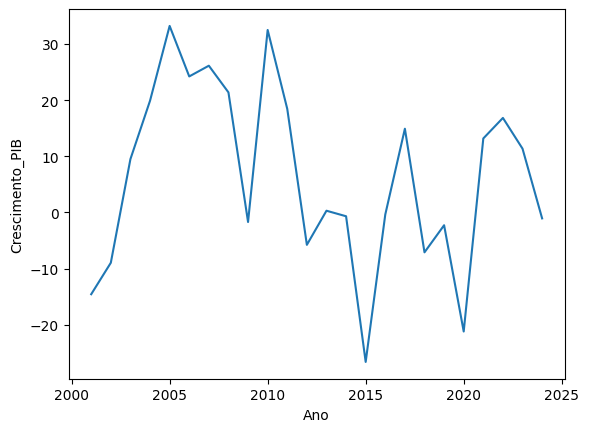

In [ ]:
sns.lineplot(data=df_taxes, x=df_taxes.iloc[:, 0], y=df_taxes.iloc[:, 1])
# este gráfico apresenta através da coluna de crescimento do PIB em relação a coluna por ano

<Axes: xlabel='Ano', ylabel='Crescimento_Exportação_Tecnologia'>

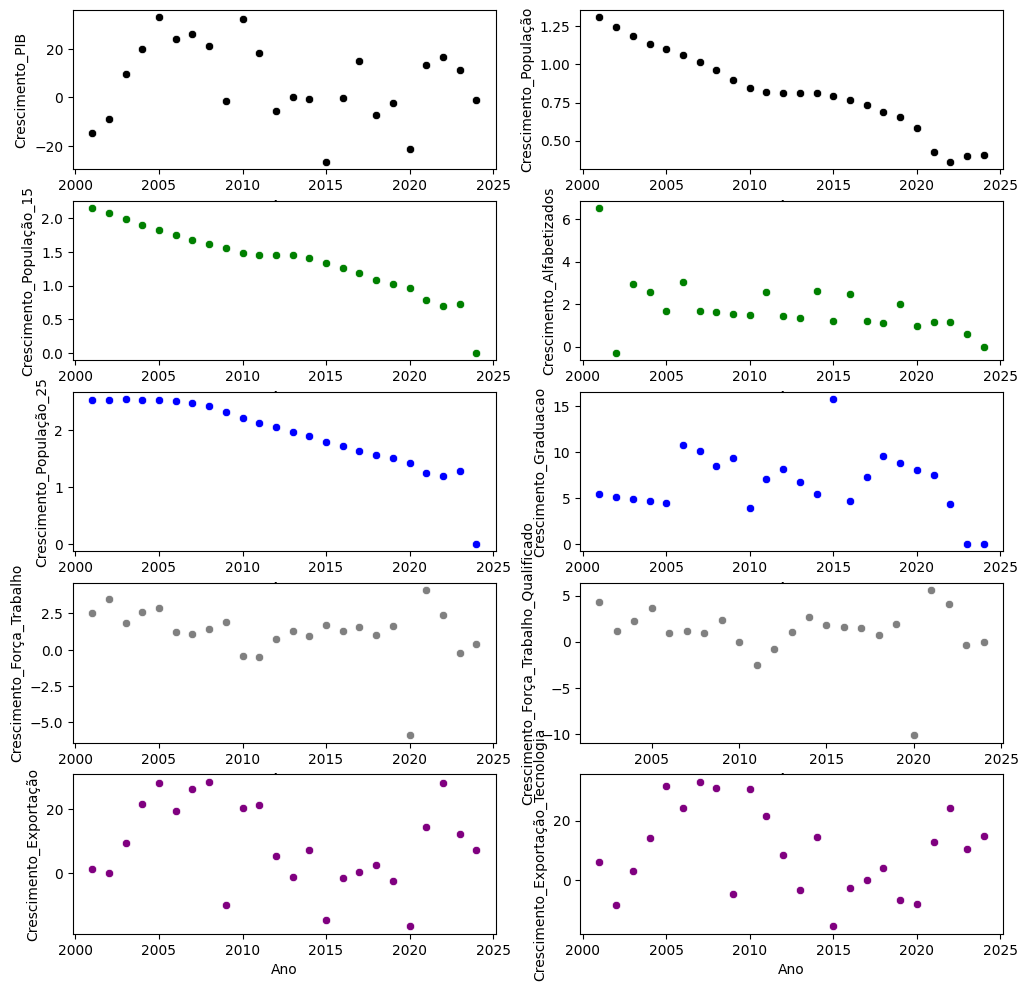

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12))

sns.scatterplot(ax=axes[0, 0], data = df_taxes, x='Ano', y='Crescimento_PIB', color='black')
sns.scatterplot(ax=axes[0, 1], data = df_taxes, x='Ano', y='Crescimento_População', color='black')

sns.scatterplot(ax=axes[1, 0], data = df_taxes, x='Ano', y='Crescimento_População_15', color='green')
sns.scatterplot(ax=axes[1, 1], data = df_taxes, x='Ano', y='Crescimento_Alfabetizados', color='green')

sns.scatterplot(ax=axes[2, 0], data = df_taxes, x='Ano', y='Crescimento_População_25', color='blue')
sns.scatterplot(ax=axes[2, 1], data = df_taxes, x='Ano', y='Crescimento_Graduacao', color='blue')

sns.scatterplot(ax=axes[3, 0], data = df_taxes, x='Ano', y='Crescimento_Força_Trabalho', color='gray')
sns.scatterplot(ax=axes[3, 1], data = df_taxes, x='Ano', y='Crescimento_Força_Trabalho_Qualificado', color='gray')

sns.scatterplot(ax=axes[4, 0], data = df_taxes, x='Ano', y='Crescimento_Exportação', color='purple')
sns.scatterplot(ax=axes[4, 1], data = df_taxes, x='Ano', y='Crescimento_Exportação_Tecnologia', color='purple')
# sns.scatterplot(ax=axes[2, 1], data = df_taxes, x='Ano', y='Crescimento_Alfabetizados_%', color='pink')
# sns.scatterplot(ax=axes[2, 1], data = df_taxes, x='Ano', y='Crescimento_Alfabetizados_%', color='pink')
# gráficos sobre os dados por ano como crescimento do PIB e estudo

In [ ]:
df_taxes.columns

Index(['Ano', 'Crescimento_PIB', 'Crescimento_População',
       'Crescimento_População_15', 'Crescimento_Alfabetizados',
       'Crescimento_População_25', 'Crescimento_Graduacao',
       'Crescimento_Força_Trabalho', 'Crescimento_Força_Trabalho_Qualificado',
       'Crescimento_Exportação', 'Crescimento_Exportação_Tecnologia'],
      dtype='object')

In [ ]:
colunas = ['Ano', 'Crescimento_PIB', 'Crescimento_População',
       'Crescimento_População_15', 'Crescimento_Alfabetizados',
       'Crescimento_População_25', 'Crescimento_Graduacao',
       'Crescimento_Força_Trabalho', 'Crescimento_Força_Trabalho_Qualificado']

df_taxes2 = df_taxes[colunas]

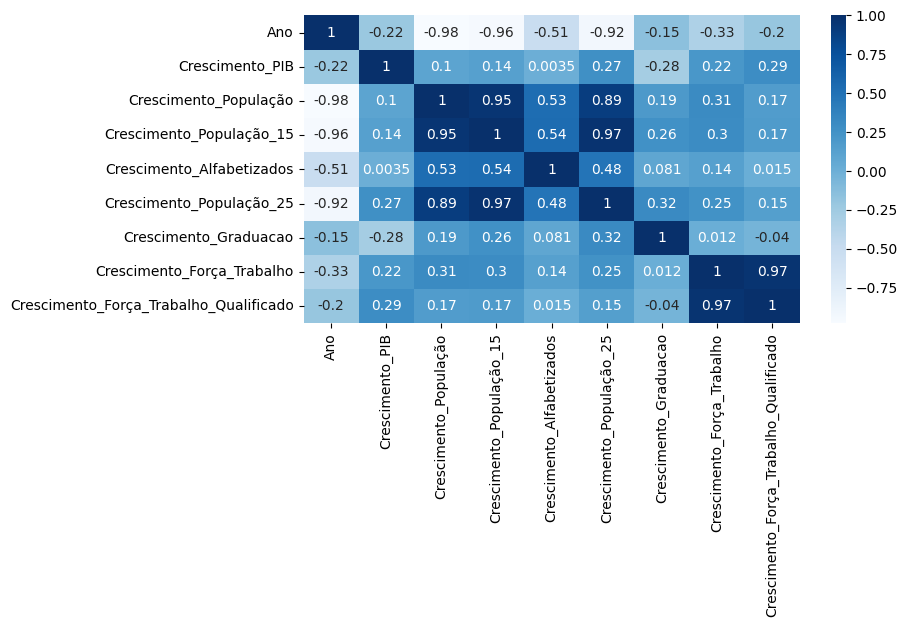

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_taxes2.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()
# correlação entre as colunas

# **Boxplots por taxas**

In [ ]:
df_taxes.columns

Index(['Ano', 'Crescimento_PIB', 'Crescimento_População',
       'Crescimento_População_15', 'Crescimento_Alfabetizados',
       'Crescimento_População_25', 'Crescimento_Graduacao',
       'Crescimento_Força_Trabalho', 'Crescimento_Força_Trabalho_Qualificado',
       'Crescimento_Exportação', 'Crescimento_Exportação_Tecnologia'],
      dtype='object')

<Axes: ylabel='Crescimento_PIB'>

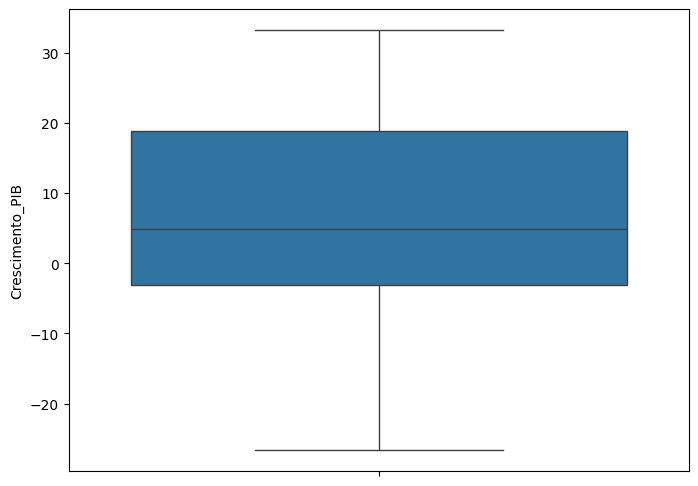

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_PIB')

<Axes: ylabel='Crescimento_População'>

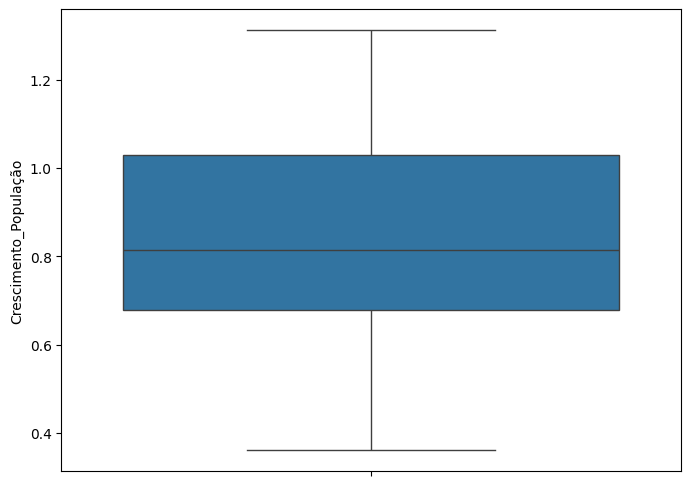

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_População')

<Axes: ylabel='Crescimento_População_15'>

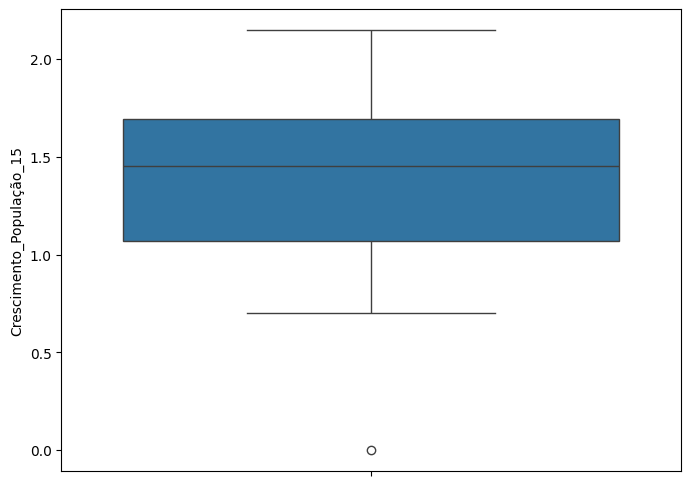

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_População_15')

<Axes: ylabel='Crescimento_Alfabetizados'>

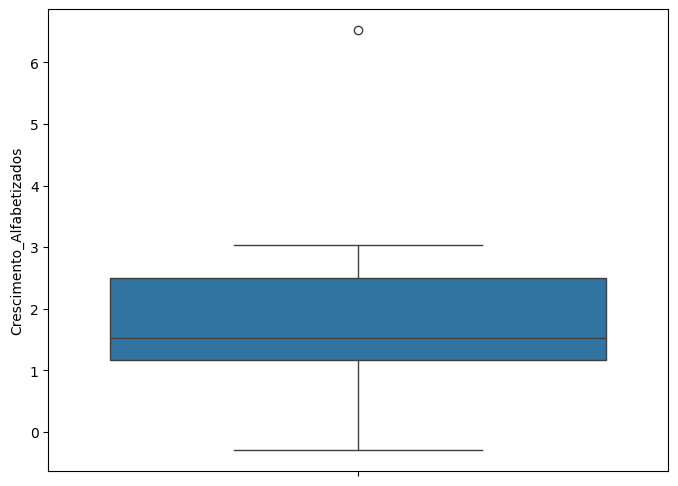

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Alfabetizados')

<Axes: ylabel='Crescimento_População_25'>

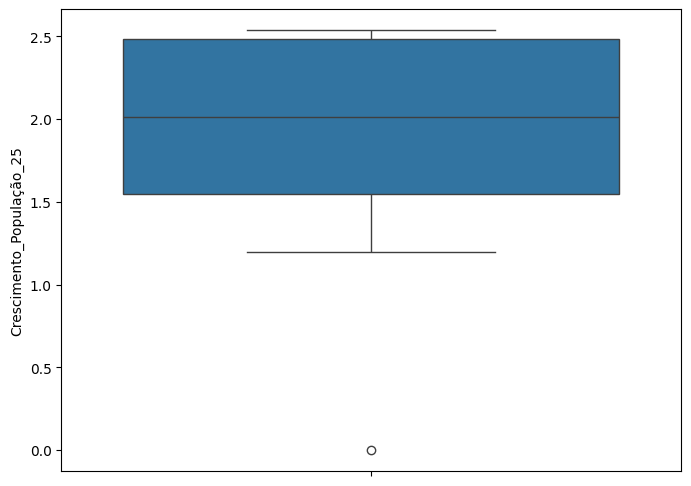

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_População_25')

<Axes: ylabel='Crescimento_Graduacao'>

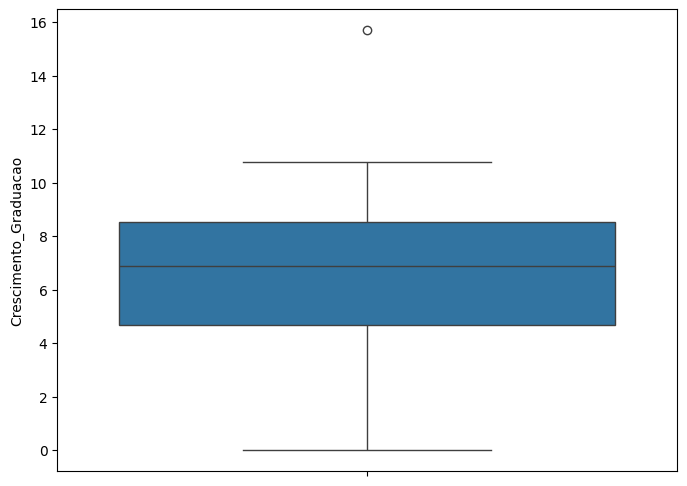

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Graduacao')

<Axes: ylabel='Crescimento_Força_Trabalho'>

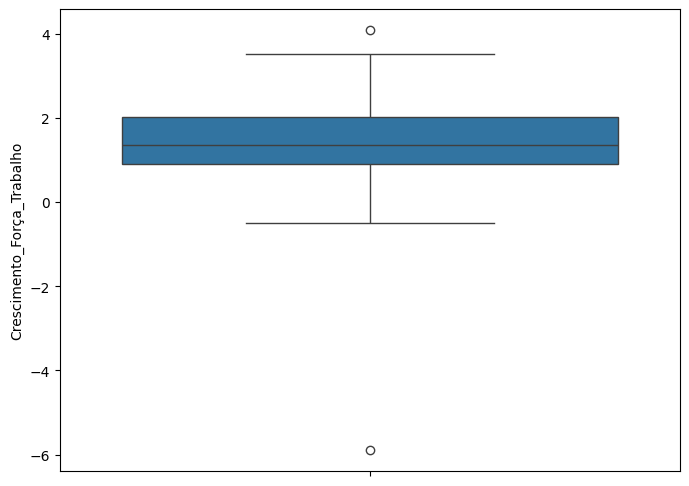

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Força_Trabalho')

<Axes: ylabel='Crescimento_Força_Trabalho_Qualificado'>

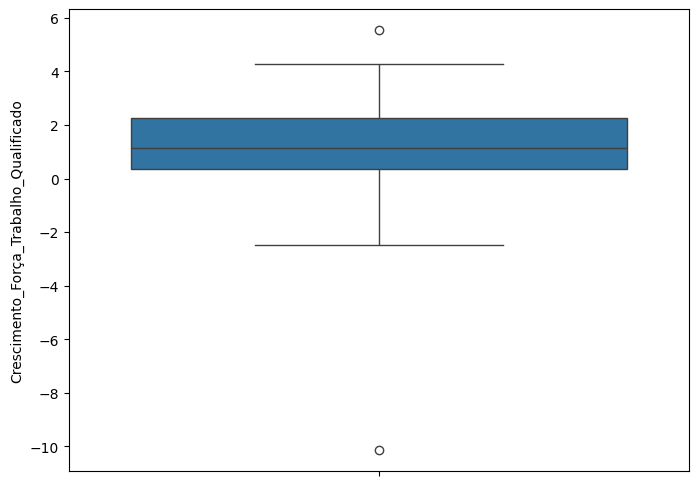

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Força_Trabalho_Qualificado')

<Axes: ylabel='Crescimento_Exportação'>

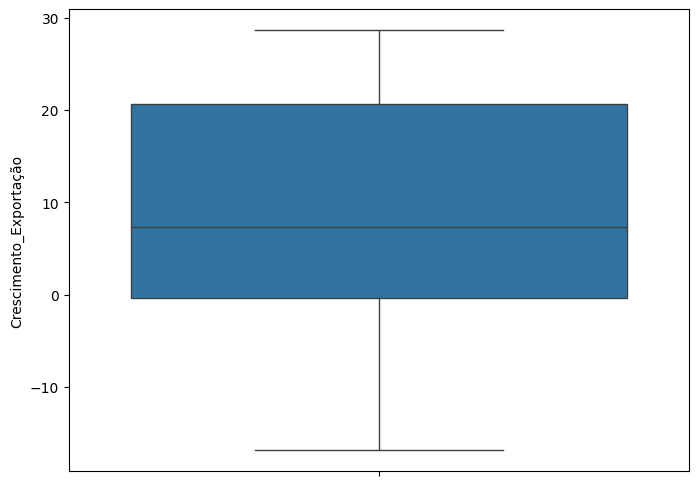

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Exportação')

<Axes: ylabel='Crescimento_Exportação_Tecnologia'>

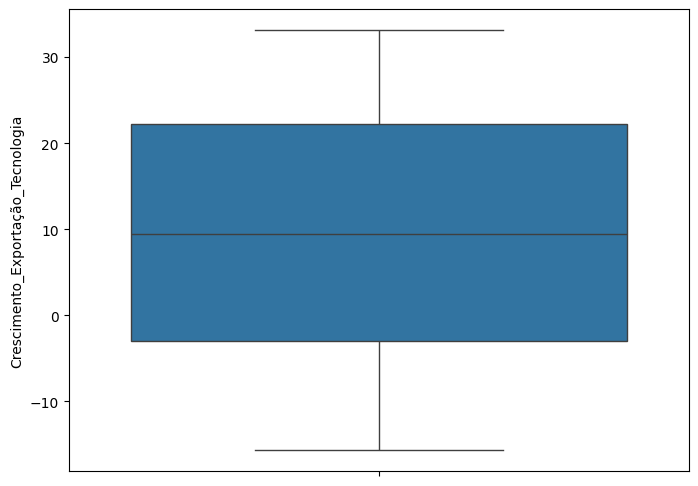

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data=df_taxes, y='Crescimento_Exportação_Tecnologia')

# **Cálculos em relação ao PIB**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Crescimento_Força_Trabalho_Qualificado', ylabel='Crescimento_PIB'>

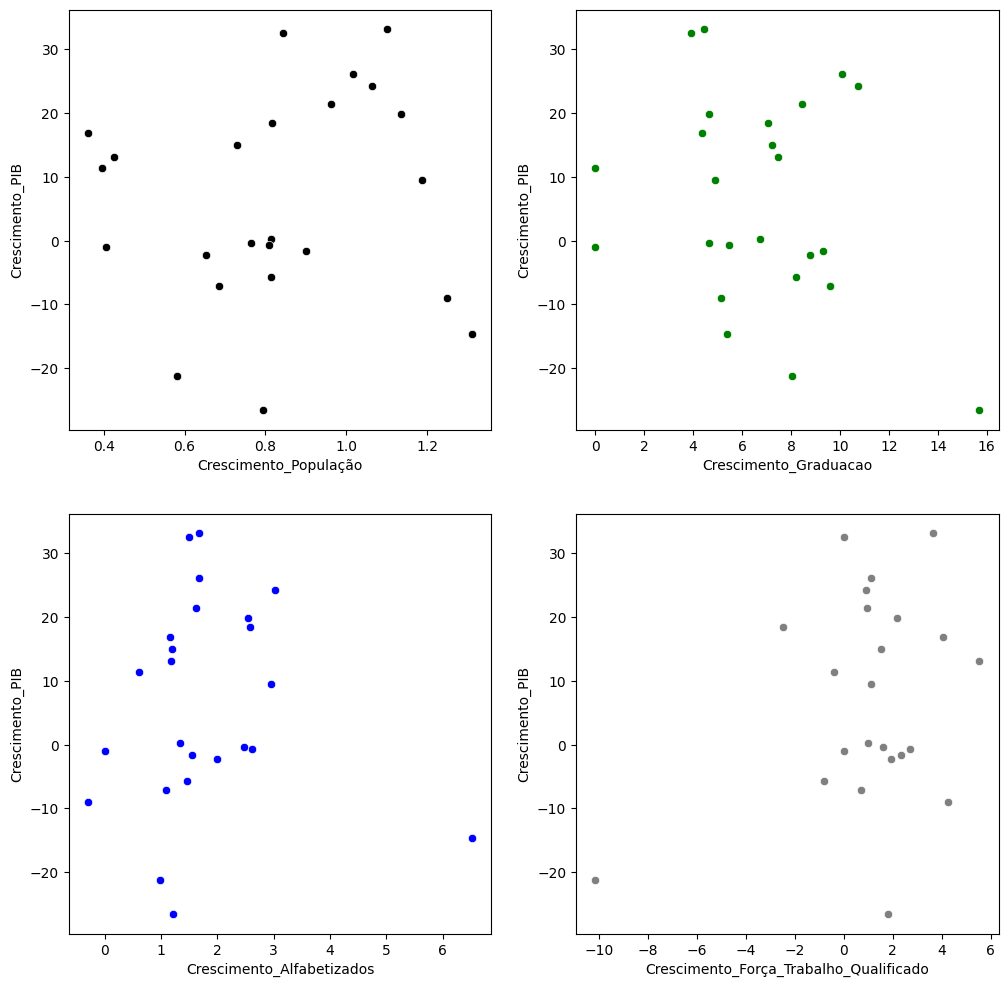

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(ax=axes[0, 0], data = df_taxes, x='Crescimento_População', y='Crescimento_PIB', color='black')

sns.scatterplot(ax=axes[0, 1], data = df_taxes, x='Crescimento_Graduacao', y='Crescimento_PIB', color='green')

sns.scatterplot(ax=axes[1, 0], data = df_taxes, x='Crescimento_Alfabetizados', y='Crescimento_PIB', color='blue')

sns.scatterplot(ax=axes[1, 1], data = df_taxes, x='Crescimento_Força_Trabalho_Qualificado', y='Crescimento_PIB', color='gray')


# gráficos sobre os dados por ano como crescimento do PIB e estudo

Verificando se o crescimento do PIB se correlaciona com o crescimento da população

<Axes: xlabel='Crescimento_População', ylabel='Crescimento_PIB'>

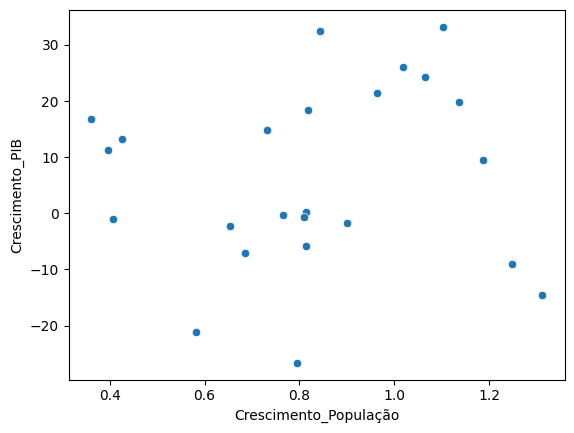

In [ ]:
sns.scatterplot(x='Crescimento_População', y='Crescimento_PIB', data=df_taxes)

Verificando se o crescimento do PIB se correlaciona com o crescimento de graduações

<Axes: xlabel='Crescimento_Graduacao', ylabel='Crescimento_PIB'>

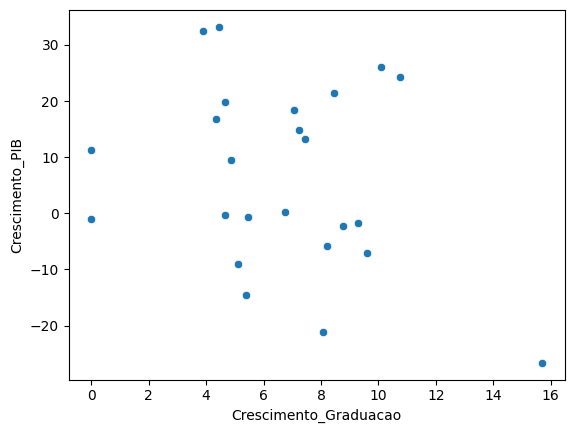

In [ ]:
sns.scatterplot(x='Crescimento_Graduacao', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Graduacao'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

-0.2787


Verificando se o crescimento do PIB se correlaciona com o crescimento de alfabetização


<Axes: xlabel='Crescimento_Alfabetizados', ylabel='Crescimento_PIB'>

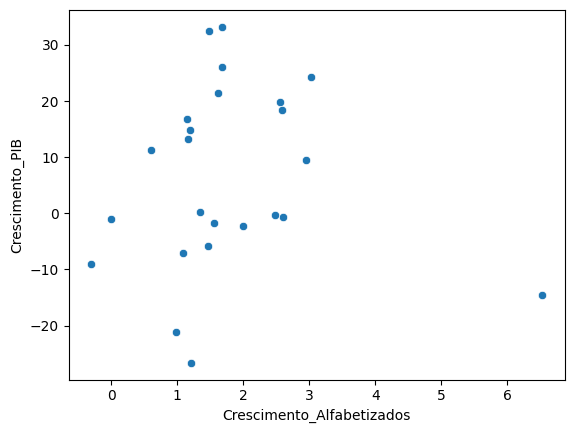

In [ ]:
sns.scatterplot(x='Crescimento_Alfabetizados', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Alfabetizados'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

0.0035


Verificando se o crescimento do PIB se correlaciona com o crescimento de força de trabalho

<Axes: xlabel='Crescimento_Força_Trabalho', ylabel='Crescimento_PIB'>

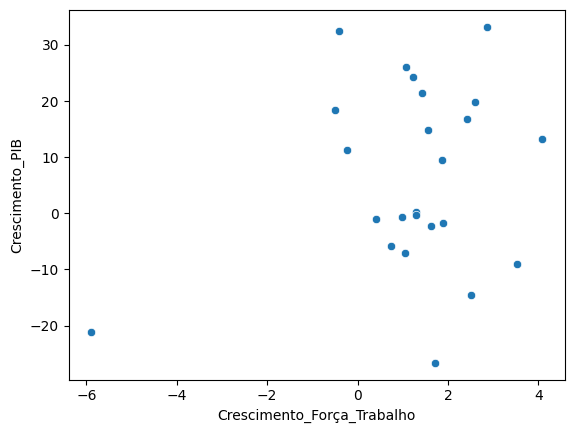

In [ ]:
sns.scatterplot(x='Crescimento_Força_Trabalho', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Força_Trabalho'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

0.2172


Verificando se o crescimento do PIB se correlaciona com o crescimento de força de trabalho qualificada

<Axes: xlabel='Crescimento_Força_Trabalho_Qualificado', ylabel='Crescimento_PIB'>

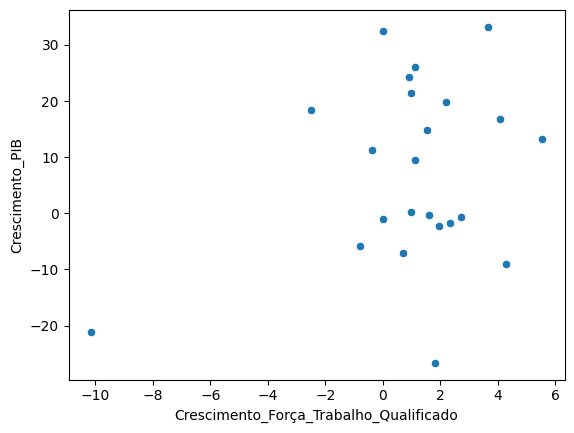

In [ ]:
sns.scatterplot(x='Crescimento_Força_Trabalho_Qualificado', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Força_Trabalho_Qualificado'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

0.2905


Verificando se o crescimento do PIB se correlaciona com o crescimento de exportação

<Axes: xlabel='Crescimento_Exportação', ylabel='Crescimento_PIB'>

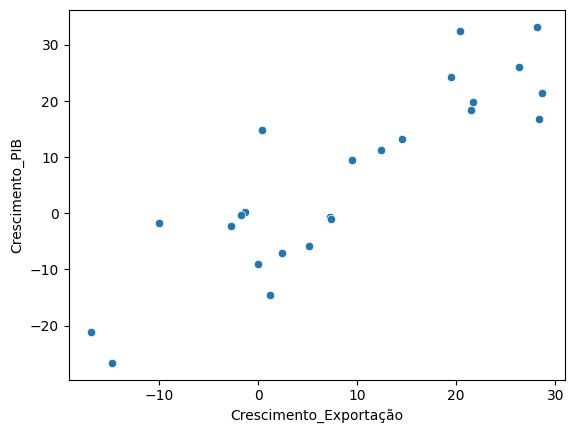

In [ ]:
sns.scatterplot(x='Crescimento_Exportação', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Exportação'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

0.8805


Verificando se o crescimento do PIB se correlaciona com o crescimento de exportação de tecnologia

<Axes: xlabel='Crescimento_Exportação_Tecnologia', ylabel='Crescimento_PIB'>

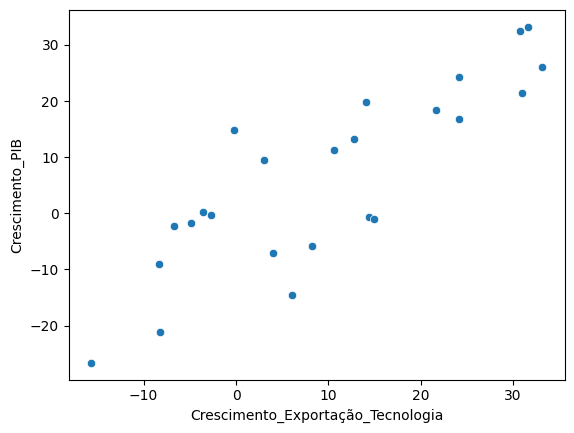

In [ ]:
sns.scatterplot(x='Crescimento_Exportação_Tecnologia', y='Crescimento_PIB', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Exportação_Tecnologia'].corr(df_taxes['Crescimento_PIB'])
print(f'{correlacao:.4f}')

0.8418


<Axes: xlabel='Crescimento_Exportação_Tecnologia', ylabel='Crescimento_Força_Trabalho_Qualificado'>

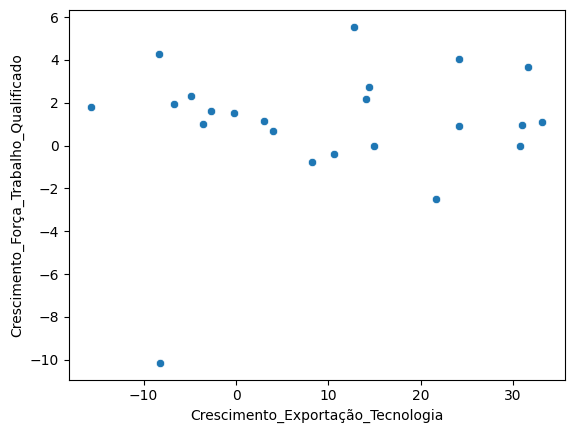

In [ ]:
sns.scatterplot(x='Crescimento_Exportação_Tecnologia', y='Crescimento_Força_Trabalho_Qualificado', data=df_taxes)

In [ ]:
correlacao = df_taxes['Crescimento_Exportação_Tecnologia'].corr(df_taxes['Crescimento_Força_Trabalho_Qualificado'])
print(f'{correlacao:.4f}')

0.1393


# **Boxplots com recortes de dados inteiros**

# **Etc**

In [ ]:
# Selecionar apenas as colunas relevantes (PIB e pessoas formadas)
colunas = [
    "Crescimento_PIB_%",
    "Crescimento_Graduacao_%"
]

# Criar um novo dataframe só com essas colunas
df_PIB_Pop_25 = df_taxes[colunas]

# Calcular matriz de correlação
matriz_corr = df_PIB_Pop_25.corr(method="pearson")

print(matriz_corr)

KeyError: "None of [Index(['Crescimento_PIB_%', 'Crescimento_Graduacao_%'], dtype='object')] are in the [columns]"

In [ ]:
plt.matshow(matriz_corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(matriz_corr.columns)), matriz_corr.columns, rotation=90)
plt.yticks(range(len(matriz_corr.columns)), matriz_corr.columns)
plt.show()

In [ ]:
df_splits = df_taxes.copy()

In [ ]:
df_splits.columns

Index(['Ano', 'Crescimento_PIB', 'Crescimento_População',
       'Crescimento_População_15', 'Crescimento_Alfabetizados',
       'Crescimento_População_25', 'Crescimento_Graduacao',
       'Crescimento_Força_Trabalho', 'Crescimento_Força_Trabalho_Qualificado',
       'Crescimento_Exportação', 'Crescimento_Exportação_Tecnologia'],
      dtype='object')

In [ ]:
df_splits['Recorte'] = pd.cut(df_splits['Ano'], bins=[2000, 2010, 2020, 2025], labels=['2000s', '2010s', '2020s'])

<Axes: xlabel='Recorte', ylabel='Crescimento_PIB'>

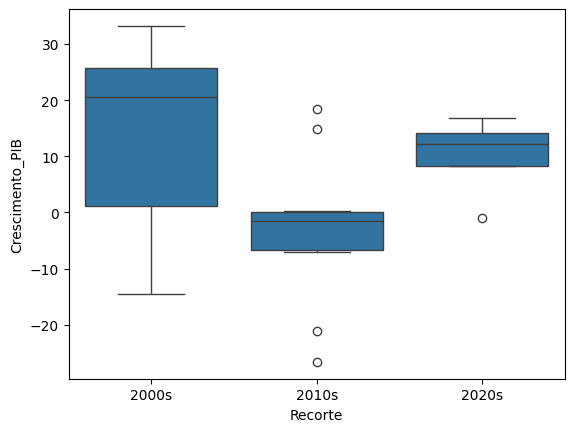

In [ ]:
sns.boxplot(x='Recorte', y='Crescimento_PIB', data=df_splits)

<Axes: xlabel='Recorte', ylabel='Crescimento_Exportação_Tecnologia'>

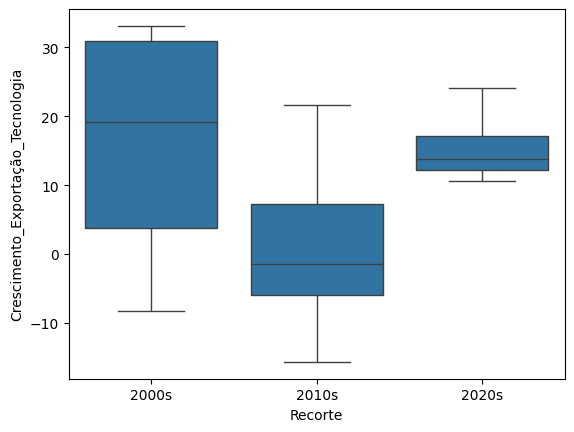

In [ ]:
sns.boxplot(x='Recorte', y='Crescimento_Exportação_Tecnologia', data=df_splits)

<Axes: xlabel='Recorte', ylabel='Crescimento_Força_Trabalho_Qualificado'>

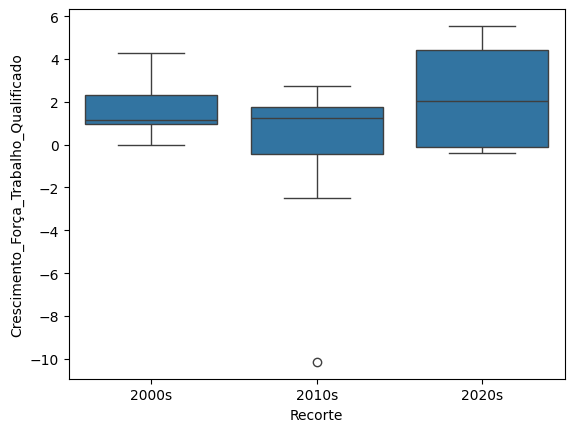

In [ ]:
sns.boxplot(x='Recorte', y='Crescimento_Força_Trabalho_Qualificado', data=df_splits)

<Axes: xlabel='Recorte', ylabel='Crescimento_Graduacao'>

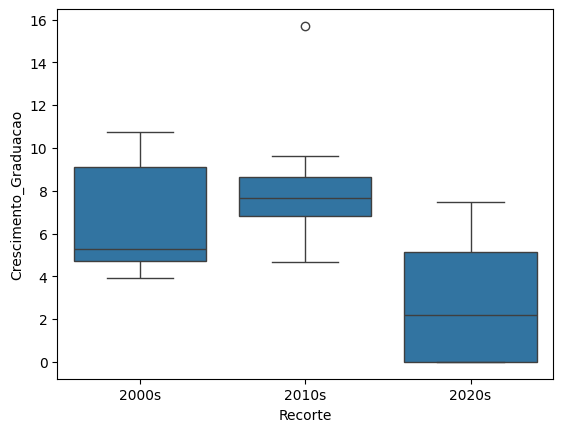

In [ ]:
sns.boxplot(x='Recorte', y='Crescimento_Graduacao', data=df_splits)